In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *

In [2]:
train = pd.read_csv('data/train.csv', **set_parameter_csv)
display(train.head())
test = pd.read_csv('data/test.csv', **set_parameter_csv)
display(test.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
null_verificator(train)

,Nulos,Cantidad,Tipo Col,Porcentaje
Loan_ID,False,0,object,0 %
Gender,True,13,object,2.12 %
Married,True,3,object,0.49 %
Dependents,True,15,object,2.44 %
Education,False,0,object,0 %
Self_Employed,True,32,object,5.21 %
ApplicantIncome,False,0,int64,0 %
CoapplicantIncome,False,0,float64,0 %
LoanAmount,True,22,float64,3.58 %
Loan_Amount_Term,True,14,float64,2.28 %


In [4]:
train['Credit_History'] = train['Credit_History'] .astype(str)
test['Credit_History'] = test['Credit_History'] .astype(str)

In [5]:
list_percentiles = [0.01, .05,.1, .125,.25, .375, .5, .625, .75, .85, .95, .99]
train.describe(percentiles=list_percentiles)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
1%,1025.000000,0.000000,30.000000,84.00000
5%,1897.550000,0.000000,56.000000,180.00000
10%,2216.100000,0.000000,71.000000,294.00000
12.5%,2373.500000,0.000000,80.000000,360.00000
25%,2877.500000,0.000000,100.000000,360.00000
37.5%,3324.750000,0.000000,113.000000,360.00000


In [6]:
train.drop(['Loan_ID'], axis=1).describe(include=['object', 'bool'])

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614,614,614
unique,2,2,4,2,2,3,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,489,398,345,480,500,475,233,422


In [7]:
cols_str = train.select_dtypes(include=['object']).columns[1:-1]
cols_str

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
def compare_categories(cols, train, test):
    detected = 0
    for col in cols_str:
        diff_cat = set(test[col].unique()) - set(train[col].unique())
        if diff_cat:
            detected += 1
            print(col.upper(), diff_cat)
            
    if detected == 0:
        print("CATEGORIAS HOMOGENEAS EN TRAIN Y TEST")

In [32]:
compare_categories(cols_str, train, test)

CATEGORIAS HOMOGENEAS EN TRAIN Y TEST


## CATEGORIES ---> NUMERIC

In [9]:
for col in cols_str:
    print(col, set(train[col].unique()))

Gender {nan, 'Female', 'Male'}
Married {'Yes', nan, 'No'}
Dependents {'3+', nan, '0', '1', '2'}
Education {'Graduate', 'Not Graduate'}
Self_Employed {'Yes', nan, 'No'}
Credit_History {'nan', '0.0', '1.0'}
Property_Area {'Rural', 'Urban', 'Semiurban'}


In [10]:
def categorie_dicc_numeric(dicc_convertion, col, train, test, replace_nan=-1):
    train[col] = train[col].map(dicc_convertion)
    test[col] = test[col].map(dicc_convertion)
    train[col].fillna(replace_nan, inplace=True)
    test[col].fillna(replace_nan, inplace=True)
    return train, test

In [11]:
# Gender {nan, 'Male', 'Female'}
dicc_gender = {
    'Male': 1,
    'Female': 0
}
train, test = categorie_dicc_numeric(dicc_gender, 'Gender', train, test)

In [12]:
# Married {nan, 'Yes', 'No'}
dicc_married = {
    'Yes': 1,
    'No': 0
}
train, test = categorie_dicc_numeric(dicc_married, 'Married', train, test)

In [13]:
# Dependents {nan, '2', '3+', '0', '1'}
dicc_dependents = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3
}
train, test = categorie_dicc_numeric(dicc_dependents, 'Dependents', train, test)

In [14]:
# Education {'Not Graduate', 'Graduate'
dicc_education = {
    'Not Graduate': 0,
    'Graduate': 1
}
train, test = categorie_dicc_numeric(dicc_education, 'Education', train, test)

In [15]:
# Self_Employed {nan, 'Yes', 'No'}
dicc_self_employed = {
    'Yes': 1,
    'No': 0
}
train, test = categorie_dicc_numeric(dicc_self_employed, 'Self_Employed', train, test)

In [16]:
# Credit_History {'0.0', '1.0', 'nan'}
dicc_credit_history = {
    '0.0': 0,
    '1.0': 1
}
train, test = categorie_dicc_numeric(dicc_credit_history, 'Credit_History', train, test)

In [17]:
# Property_Area {'Semiurban', 'Rural', 'Urban'}
dicc_area = {
    'Semiurban': 1,
    'Rural': 2,
    'Urban': 3
}
train, test = categorie_dicc_numeric(dicc_area, 'Property_Area', train, test)

## 'Loan_Status' TO NUMERICA

In [18]:
train['Loan_Status'].value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
dicc_status = {
    'Y': 1, 'N': 0
}
train['Loan_Status'] = train['Loan_Status'].map(dicc_status)

## GRAPHS VAR CATEGORIES

In [122]:
def flash_analysis(data, col_init, col_out, **kwargs):
    print("="*10, col_init.upper(), "="*10)
    color_label = kwargs.get('color_label', 'black')
    print(pd.DataFrame(data[col_init]).corrwith(data[col_out]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[0], center=0, cmap="YlGnBu", fmt='.2%'
    )
    sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[1]
    )

========== GENDER ==========
Gender    0.02904
dtype: float64
========== MARRIED ==========
Married    0.075547
dtype: float64
========== DEPENDENTS ==========
Dependents    0.014263
dtype: float64
========== EDUCATION ==========
Education    0.085884
dtype: float64
========== SELF_EMPLOYED ==========
Self_Employed   -0.015909
dtype: float64
========== CREDIT_HISTORY ==========
Credit_History    0.280181
dtype: float64
========== PROPERTY_AREA ==========
Property_Area   -0.103253
dtype: float64


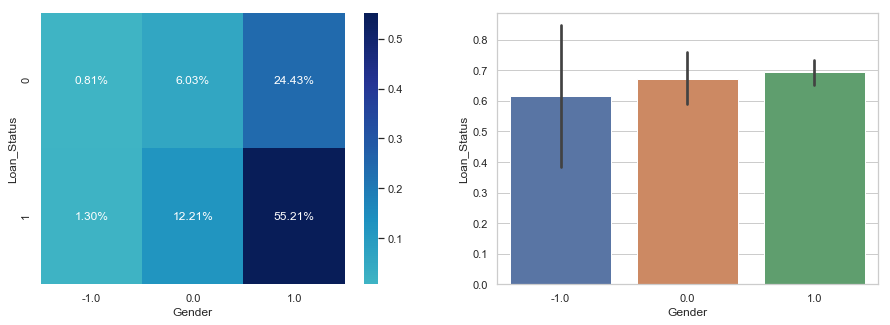

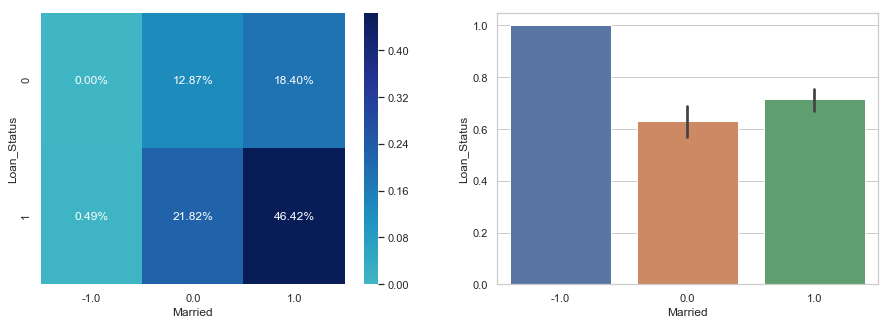

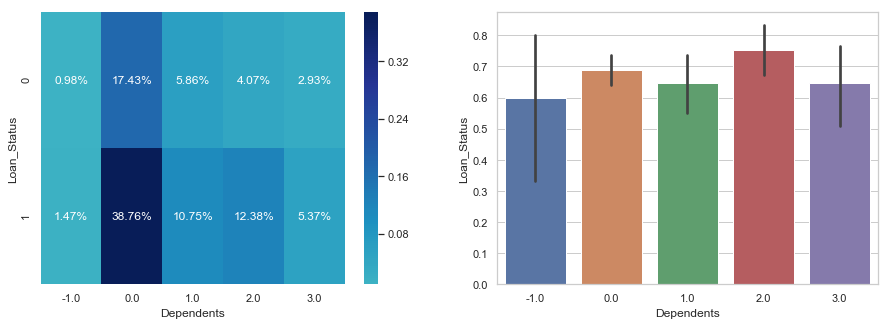

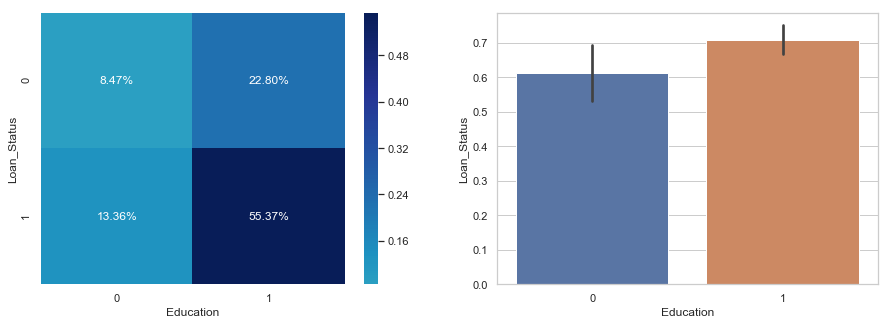

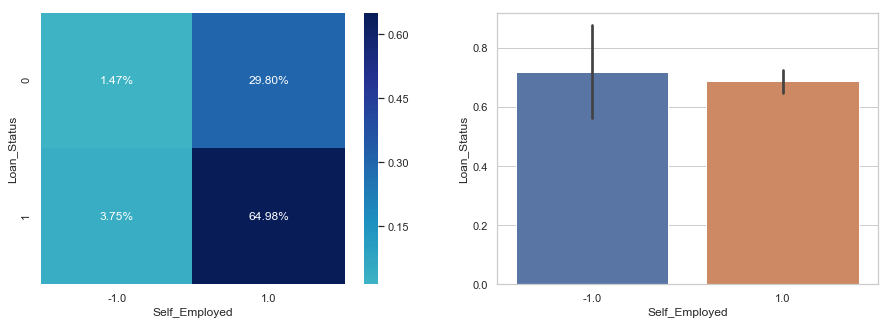

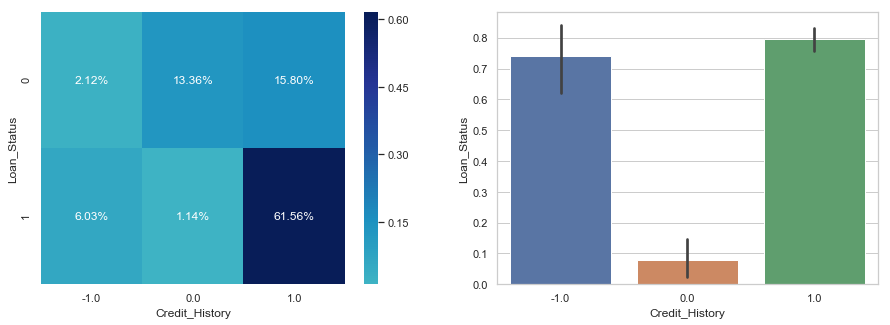

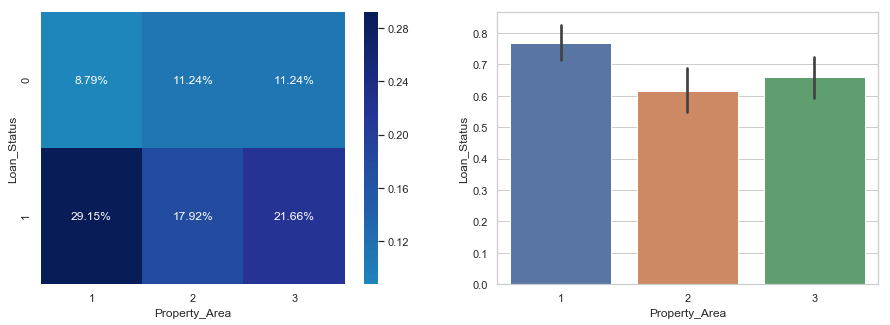

In [123]:
import warnings
warnings.simplefilter('error', UserWarning)
for col in cols_str:
    flash_analysis(train, col, 'Loan_Status')